---
# Sklearn load_breast_cancer dataset
___

Wisconsin Diagnostic Breast Cancer Dataset

- Target : Malignant, Benign
- Feature : Mean, Vaiance, Worst(outlier or maximum value) of
    - radius
    - texture
    - perimeter
    - area 
    - smoothness
    - compactness
    - concavity
    - concave points
    - symmetry
    - fractal dimension

# Prepare for Training

In [1]:
import numpy as np
import pandas as pd
import sklearn.datasets
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn-whitegrid')

## sklearn.load_breast_cancer()

In [2]:
cancer = sklearn.datasets.load_breast_cancer()
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [3]:
print(f'Dataset Shape : {cancer.data.shape}')
print(f'Dataset Target : {cancer.target_names}')
print(f'Dataset Target Number : {len(cancer.target_names)}')

Dataset Shape : (569, 30)
Dataset Target : ['malignant' 'benign']
Dataset Target Number : 2


In [6]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

## Preprocessing

In [9]:
df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
label = pd.Series(cancer.target, dtype = "category")

#pd.Series.cat = pd.Categorical
label= label.cat.rename_categories(cancer.target_names)
df['label'] = label
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,malignant
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,malignant
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,malignant
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,malignant
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,benign


## EDA

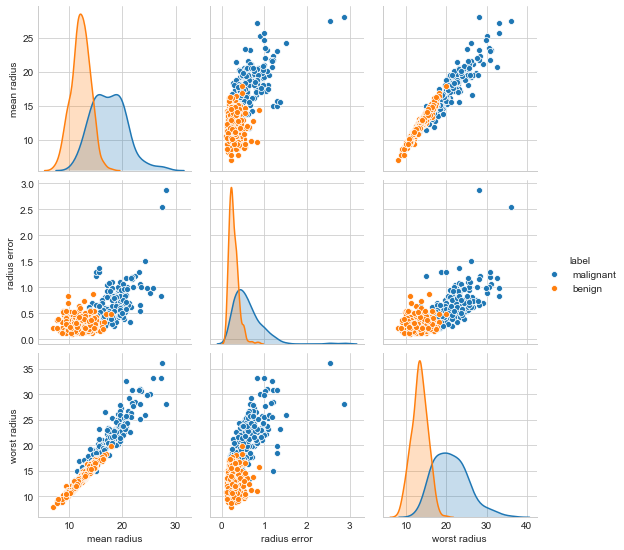

In [10]:
sns.pairplot(df[['mean radius', 'radius error', 'worst radius', 'label']] , hue = "label")

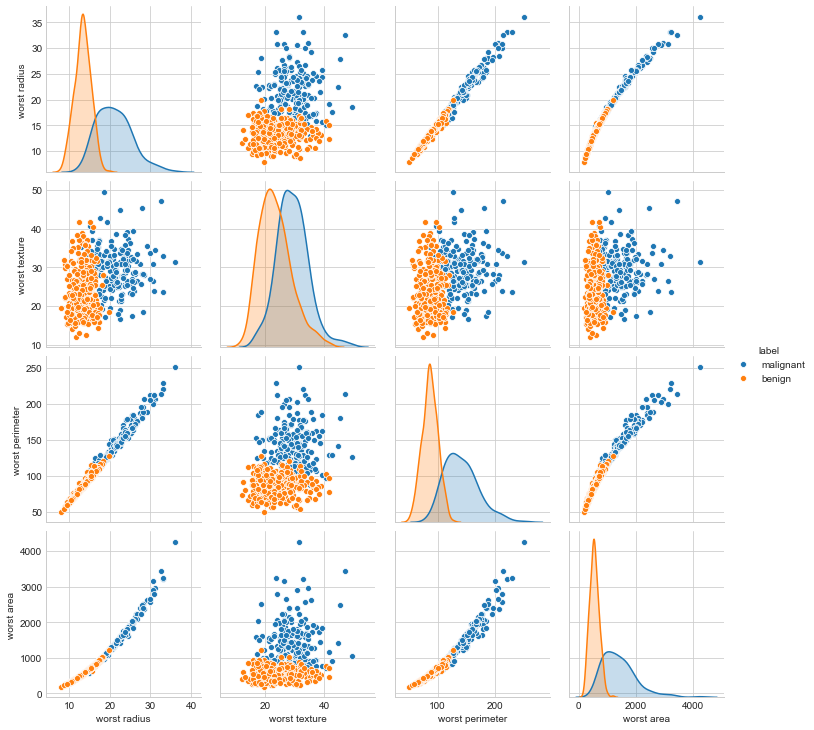

In [25]:
sns.pairplot(df[["worst radius", "worst texture", "worst perimeter", "worst area", "label"]] , hue = "label")

## train_test_split

In [11]:
from sklearn.model_selection import train_test_split

X = cancer.data
Y = cancer.target

# stratify : let train/test data target to have same ratio with input dataset target
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size = 0.2, random_state = 0, stratify=Y)

In [12]:
print(f'Train Data Shape : {x_train.shape}')

Train Data Shape : (455, 30)


# Neural Network by PyTorch

In [13]:
import torch
import torch.nn as nn
import torch.optim

## Neural Network Design

In [14]:
in_features = x_train.shape[1]
n_data = x_train.shape[0]
n_hidden = 10
n_target = len(cancer.target_names)

# Two hidden layer network
net = nn.Sequential(nn.Linear(in_features=in_features, out_features=n_hidden),
                    nn.Tanh(),
                    nn.Linear(in_features=n_hidden, out_features=n_target),
                    nn.LogSoftmax(dim=1) # LogSoftmax() + NLLLoss() = CrossEntropyLoss()
                    )
net

Sequential(
  (0): Linear(in_features=30, out_features=10, bias=True)
  (1): Tanh()
  (2): Linear(in_features=10, out_features=2, bias=True)
  (3): LogSoftmax()
)

In [15]:
# data for training
xtrain, ytrain = torch.tensor(x_train).float(), torch.tensor(y_train).long()
xval, yval = torch.tensor(x_val).float(), torch.tensor(y_val).long()

print(f'xtrain dtype & shape : {xtrain.dtype, xtrain.shape}')
print(f'ytrain dtype & shape : {ytrain.dtype, ytrain.shape}')

xtrain dtype & shape : (torch.float32, torch.Size([455, 30]))
ytrain dtype & shape : (torch.int64, torch.Size([455]))


In [16]:
# net working test
with torch.no_grad():
    prediction = net(xtrain[:5])
    
indx_pred = torch.argmax(prediction, dim=1)

print ('target names: ', cancer.target_names)
for i in range(prediction.shape[0]):
    print ('prediction: ', prediction[i], 'argmax: ', indx_pred[i], ' predicted: ', cancer.target_names[indx_pred[i]])

target names:  ['malignant' 'benign']
prediction:  tensor([-0.6825, -0.7039]) argmax:  tensor(0)  predicted:  malignant
prediction:  tensor([-0.6835, -0.7029]) argmax:  tensor(0)  predicted:  malignant
prediction:  tensor([-0.6825, -0.7039]) argmax:  tensor(0)  predicted:  malignant
prediction:  tensor([-0.6825, -0.7039]) argmax:  tensor(0)  predicted:  malignant
prediction:  tensor([-0.6825, -0.7039]) argmax:  tensor(0)  predicted:  malignant


## Optimizer & Loss Function

- `LogSoftMax()` + `NLLLoss()` = simply choose the one based on the target label and update it only.
- This is equal to `CrossEntropyLoss()`

In [17]:
optimizer = torch.optim.Adam(net.parameters(), lr=1e-5)
loss_fn = nn.NLLLoss()

## Training Loop

In [20]:
def accuracy(pred, target, txt):
    comp = torch.argmax(pred, dim = 1)  == target
    ncorrect = comp.sum()
    acc = int(ncorrect) / len(pred)
#     if txt is not None:
#         print(f'{txt}: {comp}, {ncorrect}, {target}, {acc}')
    return acc

def training_loop(n_epochs, optim, model, loss_fn, xtrain, ytrain, xval, yval):
    tloss, tacc, vloss, vacc = [], [], [], []
    for epoch in range(1, n_epochs+1):
        ypred = model(xtrain)
        loss_train = loss_fn(ypred, ytrain)
        
        optim.zero_grad()
        loss_train.backward()
        optim.step()
        
        with torch.no_grad():
            yval_pred = model(xval)
            loss_val = loss_fn(yval_pred, yval)

        # accuracy computation
        with torch.no_grad():
            acc_t = accuracy(ypred, ytrain, 'train')
            acc_v = accuracy(yval_pred, yval, 'validation')
        
        if epoch == 1 or epoch % 2000 == 0:
            print(f'Epoch {epoch:5d}, tloss {loss_train:.2f} t_acc: {acc_t:.2f}  vloss {loss_val:.2f}  v_acc: {acc_v:.2f}')
            
        # record for history return
        tloss.append(loss_train.item())
        vloss.append(loss_val.item())
        tacc.append(acc_t)
        vacc.append(acc_v)
        
    print ('finished.')
    return {'tloss': tloss, 'tacc': tacc, 'vloss': vloss, 'vacc': vacc}

In [21]:
history = training_loop(n_epochs = 30000,
                        optim = optimizer,
                        model = net,
                        loss_fn = loss_fn,
                        xtrain = xtrain, ytrain = ytrain,
                        xval = xval, yval = yval)

Epoch     1, tloss 0.70 t_acc: 0.36  vloss 0.70  v_acc: 0.35
Epoch  2000, tloss 0.47 t_acc: 0.86  vloss 0.45  v_acc: 0.86
Epoch  4000, tloss 0.44 t_acc: 0.89  vloss 0.43  v_acc: 0.90
Epoch  6000, tloss 0.41 t_acc: 0.89  vloss 0.41  v_acc: 0.90
Epoch  8000, tloss 0.39 t_acc: 0.90  vloss 0.39  v_acc: 0.90
Epoch 10000, tloss 0.38 t_acc: 0.90  vloss 0.37  v_acc: 0.91
Epoch 12000, tloss 0.36 t_acc: 0.90  vloss 0.36  v_acc: 0.92
Epoch 14000, tloss 0.35 t_acc: 0.90  vloss 0.34  v_acc: 0.92
Epoch 16000, tloss 0.32 t_acc: 0.90  vloss 0.32  v_acc: 0.92
Epoch 18000, tloss 0.30 t_acc: 0.90  vloss 0.30  v_acc: 0.92
Epoch 20000, tloss 0.28 t_acc: 0.91  vloss 0.29  v_acc: 0.93
Epoch 22000, tloss 0.26 t_acc: 0.91  vloss 0.29  v_acc: 0.92
Epoch 24000, tloss 0.25 t_acc: 0.91  vloss 0.28  v_acc: 0.93
Epoch 26000, tloss 0.24 t_acc: 0.92  vloss 0.27  v_acc: 0.93
Epoch 28000, tloss 0.22 t_acc: 0.93  vloss 0.26  v_acc: 0.92
Epoch 30000, tloss 0.21 t_acc: 0.93  vloss 0.25  v_acc: 0.93
finished.


In [22]:
yt = torch.argmax(net(xtrain), dim=1)
yt

tensor([0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
        1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
        1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
        1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,

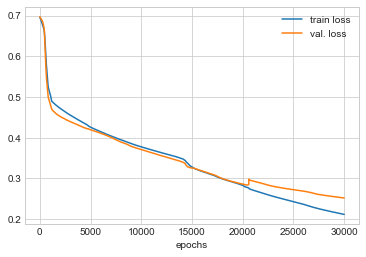

In [23]:
plt.plot(history['tloss'], label='train loss')
plt.plot(history['vloss'], label='val. loss')
plt.xlabel('epochs')
plt.legend()

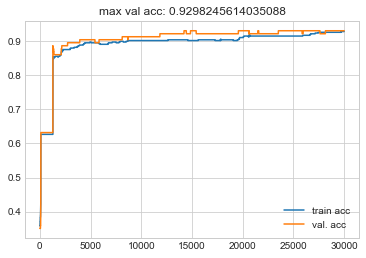

In [24]:
plt.plot(history['tacc'], label='train acc')
plt.plot(history['vacc'], label='val. acc')
mvacc = max(history['vacc'])
plt.title(f'max val acc: {mvacc}')
plt.legend()

In [ ]:
## going to add other ML training results